In [1]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from isotopde_data_v6_copy import isotopes


In [2]:
#Covert text files into csv
#convert Absorption Cross Section Data
df_abs = pd.read_csv('Absorption_Cross_Section_Data.txt', delim_whitespace=True)
df_abs.to_csv('Absorption_Cross_Section_Data.csv', index=False)

#convert Capture Cross Section Data
df_capture = pd.read_csv('Capture_Cross_Section_Data.txt', delim_whitespace=True)
df_capture.to_csv('Capture_Cross_Section_Data.csv', index=False)

#convert n2n Cross Section Data
df_n2n = pd.read_csv('n2n_Cross_Section_Data.txt', delim_whitespace=True)
df_n2n.to_csv('n2n_Cross_Section_Data.csv', index=False)

#convert Neutron Energy Groups Data
# Read the file with multi-word headers using proper header rows and column names
df_neutron_energy = pd.read_csv(
    'Neutron_Energy_Groups.txt',
    delim_whitespace=True,
    header=None,
    skiprows=1,
    names=[
        'Energy Group',
        'Lower Boundary (eV)',
        'Upper Boundary (eV)'
    ]
)
df_neutron_energy.to_csv('Neutron_Energy_Groups.csv', index=False)


In [3]:
#Create a function to load cross-section data from CSV files
# Here's a corrected version of the function:
def load_cross_section_data(file_path):
    df = pd.read_csv(file_path)
    # Do not set the index, just return the dataframe as a dict
    return df.to_dict(orient='list')

# Load cross-section data
absorption_data = load_cross_section_data('Absorption_Cross_Section_Data.csv')
capture_data = load_cross_section_data('Capture_Cross_Section_Data.csv')
n2n_data = load_cross_section_data('n2n_Cross_Section_Data.csv')

#Build a dictionary for each reaction type
absorption_data = {isotope: data for isotope, data in absorption_data.items() if isotope in isotopes}
capture_data = {isotope: data for isotope, data in capture_data.items() if isotope in isotopes}
n2n_data = {isotope: data for isotope, data in n2n_data.items() if isotope in isotopes}
# Create a dictionary to hold all cross-section data
cross_section_data = {
    'absorption': absorption_data,
    'capture': capture_data,
    'n2n': n2n_data
}
#print("absorption_data:", absorption_data)
#print("capture_data:", capture_data)
print("n2n_data:", n2n_data)

n2n_data: {'U237': [0.32655, 0.3834, 0.413, 0.46847, 0.5794, 0.65141, 0.71767, 0.78894, 0.84478, 0.9408, 1.1441, 1.2536, 1.4025, 1.5261, 1.585, 1.6091, 1.6161, 1.6103, 1.5953, 1.5716, 1.5354, 1.4833, 1.4144, 1.3221, 1.2432, 1.1667, 0.95301, 0.66218, 0.31005, 0.090021, 0.0042974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

In [4]:
# Integrate cross-section data into the isotopes dictionary
for iso in isotopes:
    #print(f"Processing isotope: {iso}")
    # Add capture (n, gamma) if available
    if iso in cross_section_data['capture']:
        #print(f"Adding capture data for {iso}")
        # Convert barns to cm^2
        isotopes[iso]['n_gamma'] = [x * 1.0e-24 for x in cross_section_data['capture'][iso]]
    # Add n,2n if available
    if iso in cross_section_data['n2n']:
        #print(f"Adding n2n data for {iso}")
        isotopes[iso]['n_2n'] = [x * 1.0e-24 for x in cross_section_data['n2n'][iso]]
    # Add absorption (n_fission) if available
    if iso in cross_section_data['absorption']:
        #print(f"Adding absorption data for {iso}")
        isotopes[iso]['n_fission'] = [x * 1.0e-24 for x in cross_section_data['absorption'][iso]]

#print("isotopes:", isotopes)


Text(0, 0.5, 'Flux')

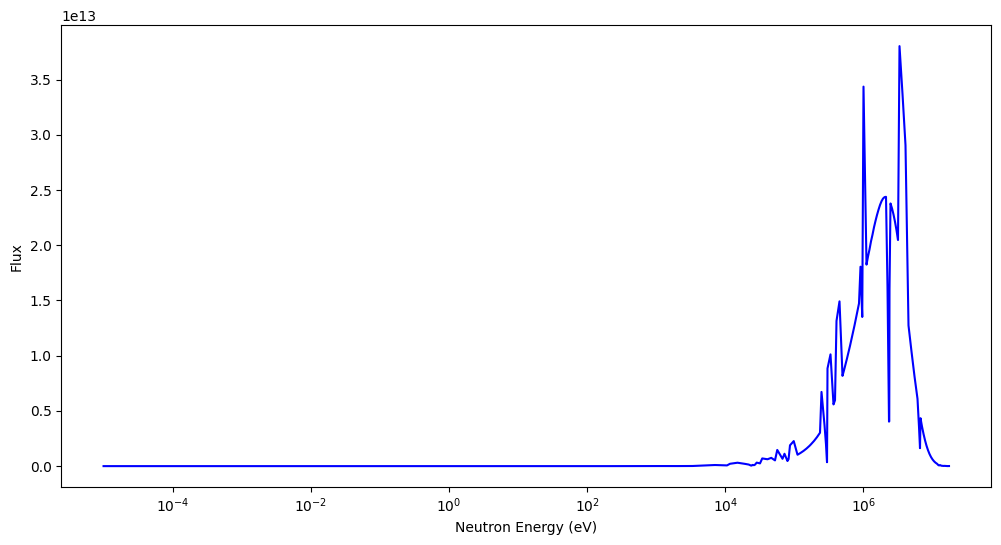

In [5]:
# Load the 175-group flux data
flux = pd.read_csv('Flux.txt', header=None).squeeze().values
#load neutron energy groups
neutron_energy_groups = pd.read_csv('Neutron_Energy_Groups.csv')

#plot neutron energy groups with respect ot flux
plt.figure(figsize=(12, 6))
plt.plot(neutron_energy_groups['Lower Boundary (eV)'], flux, label='Flux', color='blue')
plt.xscale('log')
plt.xlabel('Neutron Energy (eV)')
plt.ylabel('Flux')

In [6]:
#Load Flux (175 - Group vector)
flux_sum = np.sum(flux)

#Load Materials file 
#materials_df = pd.read_csv('Materials.txt', delim_whitespace=True, header=None, names=['Isotope', 'Concentration'])
#Materials_df is not reading materials.txt but should read Deplete_New.inp where the first two is the isotope name and the second is the mass in grams
# Read the first two rows from Deplete_New.inp and parse isotope names and masses
with open('Deplete_New.inp', 'r') as f:
    lines = [f.readline().strip() for _ in range(2)]

# Parse isotope names and masses
isotope_names = lines[0].split(':')[1].strip().split(',')
isotope_names = [name.strip() for name in isotope_names]
isotope_masses = lines[1].split(':')[1].strip().split(',')
isotope_masses = [float(m.strip()) for m in isotope_masses]

# Build the materials DataFrame
materials_df = pd.DataFrame({
    'Isotopes': isotope_names,
    'Isotope masses (g)': isotope_masses
})

# Convert the materials DataFrame to a dictionary
materials = materials_df.set_index('Isotopes')['Isotope masses (g)'].to_dict()


#create a dictionary for molar masses for each isotope
molar_masses = {
    'U234': 234.0409521,
    'U235': 235.0439299,
    'U236': 236.045568,
    'U237': 237.0487304,
    'U238': 238.0507882,
    'U239': 239.0542933,
    'Np236': 236.04657,
    'Np237': 237.0481734,
    'Np238': 238.0509466,
    'Np239': 239.052939,
    'Pu238': 238.0495599,
    'Pu239': 239.0521634,
    'Pu240': 240.0538135,
    'Pu241': 241.0568515,
    'Pu242': 242.0587428,
    'Pu243': 243.0613811,
    'Am241': 241.0568293,
    'Am242': 242.0595492,
    'Am243': 243.0613811
}

#convert Isotope masses to concentrations using molar masses

for isotope, mass in materials.items():
    if isotope in molar_masses:
        # Calculate concentration in atoms per cm^3
        concentration = (mass / molar_masses[isotope]) * 6.022e23 / 1e3  # Convert g to kg and use Avogadro's number
        materials[isotope] = concentration
    else:
        print(f"Warning: Molar mass for {isotope} not found.")
        
# Print the materials dictionary to verify concentrations
print("Materials concentrations (atoms/cm^3):", materials)

Materials concentrations (atoms/cm^3): {'U234': 2.5730539659687195e+19, 'U235': 2.562074248231841e+19, 'U238': 2.5297122708707753e+21}


In [7]:


####Below is a test code to compute reaction rates based on the flux and isotopes data
#Compute group wise reaction rates
def compute_groupwise_reaction_rates(isotopes, isotope_concentrations, flux, flux_sum):
    """
    Compute group-wise reaction rates for all isotopes in the model.

    Parameters:
        isotopes (dict): Isotope data dictionary.
        isotope_concentrations (dict): {isotope: concentration} for all isotopes (including produced ones).
        flux (np.ndarray): Neutron flux vector.
        flux_sum (float): Sum of flux vector.

    Returns:
        dict: Dictionary with keys 'capture', 'absorption', 'n2n', each mapping to {isotope: rates array}.
    """
    rates = {'capture': {}, 'absorption': {}, 'n2n': {}}
    for isotope in isotope_concentrations:
        if isotope in isotopes:
            # (n, gamma)
            n_gamma = isotopes[isotope].get('n_gamma', 0.0)
            if isinstance(n_gamma, (list, np.ndarray)):
                rates['capture'][isotope] = flux * np.array(n_gamma) / flux_sum
            else:
                rates['capture'][isotope] = np.zeros_like(flux)
            # (n, fission)
            n_fission = isotopes[isotope].get('n_fission', 0.0)
            if isinstance(n_fission, (list, np.ndarray)):
                rates['absorption'][isotope] = flux * np.array(n_fission) / flux_sum
            else:
                rates['absorption'][isotope] = np.zeros_like(flux)
            # (n,2n)
            n_2n = isotopes[isotope].get('n_2n', 0.0)
            if isinstance(n_2n, (list, np.ndarray)):
                rates['n2n'][isotope] = flux * np.array(n_2n) / flux_sum
            else:
                rates['n2n'][isotope] = np.zeros_like(flux)
        else:
            print(f"Warning: Isotope '{isotope}' not found in the isotope model.")
    return rates

# Example usage:
# Build a concentration dictionary for all isotopes (including produced ones)
# For initial materials: 
initial_concentrations = {isotope: materials[isotope] for isotope in materials if isotope in isotopes}
reaction_rates = compute_groupwise_reaction_rates(isotopes, initial_concentrations, flux, flux_sum)

#test the reaction rates
"""print("Reaction Rates:")
for reaction_type, rates in reaction_rates.items():
    print(f"{reaction_type}:")
    for isotope, rate in rates.items():
        print(f"  {isotope}: {rate}")"""
        

'print("Reaction Rates:")\nfor reaction_type, rates in reaction_rates.items():\n    print(f"{reaction_type}:")\n    for isotope, rate in rates.items():\n        print(f"  {isotope}: {rate}")'

In [8]:
#Convert cross secton data frrame to dict of arrays for quick lookup
def cross_section_lookup(isotope, reaction_type, group):
    """
    Lookup cross-section value for a given isotope, reaction type, and energy group.
    """
    if isotope in isotopes and reaction_type in isotopes[isotope]:
        return isotopes[isotope][reaction_type][group]
    else:
        raise ValueError(f"Cross-section data for {isotope} with reaction type {reaction_type} not found.")
    

#build isotope list and idex list
isotope_list = list(isotopes.keys())
index_map = {iso: i for i, iso in enumerate(isotope_list)}

#intial conditions from amterial file
N0 = np.zeros(len(isotope_list))
for index, row in materials_df.iterrows():
    iso = row['Isotopes']
    amount = materials[iso]  # Use concentration in atoms/cm^3 from the materials dictionary
    print(f"Processing isotope: {iso}, concentration: {amount}")
    if iso in index_map:
        N0[index_map[iso]] = amount
    else:
        print(f"Warning: Isotope '{iso}' not found in the isotope model.")

Processing isotope: U234, concentration: 2.5730539659687195e+19
Processing isotope: U235, concentration: 2.562074248231841e+19
Processing isotope: U238, concentration: 2.5297122708707753e+21


In [9]:

# Define the ODE system
def odes(t, y):
    """
    ODE system for burnup model using effective cross sections.
    y: vector of concentrations for each isotope.
    """
    dNdt = np.zeros_like(y)
    for i, iso in enumerate(isotope_list):
        props = isotopes[iso]
        # Loss terms: effective cross sections for each reaction type
        for reaction in props.get('loss', []):
            if reaction[1] == 'absorption':
                # Absorption (n, fission)
                sigma_fission = np.array(props.get('n_fission', np.zeros_like(flux)))
                effective_sigma_fission = np.sum(sigma_fission * flux / flux_sum)
                dNdt[i] -= effective_sigma_fission * y[i]
            elif reaction[1] == 'decay':
                # Decay
                sigma_decay = props.get('decay', 0.0)
                effective_sigma_decay = sigma_decay * y[i]
                dNdt[i] -= effective_sigma_decay * y[i]
                
            elif reaction[1] == 'absorption':
                # Absorption (n, gamma)
                sigma_gamma = props.get('n_gamma', np.zeros_like(flux))
                effective_sigma_gamma = np.sum(np.array(sigma_gamma) * flux / flux_sum)
                dNdt[i] -= effective_sigma_gamma * y[i]
            elif reaction[1] == 'n_2n':
                # n,2n reactions
                sigma_2n = props.get('n_2n', np.zeros_like(flux))
                effective_sigma_2n = np.sum(np.array(sigma_2n) * flux / flux_sum)
                dNdt[i] -= effective_sigma_2n * y[i]
        

        # Production from parent isotopes (as defined in 'prod')
        for parent, reaction in props.get('prod', []):
            j = index_map[parent]
            parent_props = isotopes[parent]
            parent_rate = 0.0
            if reaction == 'n_gamma':
                sigma = parent_props.get('n_gamma', np.zeros_like(flux))
                effective_sigma = np.sum(np.array(sigma) * flux / flux_sum)
                parent_rate = effective_sigma * y[j]
            elif reaction == 'n_2n':
                sigma = parent_props.get('n_2n', np.zeros_like(flux))
                effective_sigma = np.sum(np.array(sigma) * flux / flux_sum)
                parent_rate = effective_sigma * y[j]
            elif reaction == 'n_fission':
                sigma = parent_props.get('n_fission', np.zeros_like(flux))
                effective_sigma = np.sum(np.array(sigma) * flux / flux_sum)
                parent_rate = effective_sigma * y[j]
            elif reaction == 'decay':
                parent_rate = parent_props.get('decay', 0.0) * y[j]
            dNdt[i] += parent_rate

    return dNdt



In [10]:
# Define the burnup model parameters

#From Deplete_New.inp the 3rd line shows time unit and 4th line shows burnup and burndown durations and the 4th line shows the corresponding fluxes for each duration to know if it burnup or burndown
#calculate the burnup duration based on the unit from the user, if "d" then its days, if "y" then its years and "s" seconds and etc based on that convert burnup duration to seconds

for line in open('Deplete_New.inp'):
    if line.startswith('Time units'):
        time_unit = line.split(':')[1].strip()
    elif line.startswith('Time intervals'):
        time_intervals = list(map(float, line.split(':')[1].strip().split(',')))
    elif line.startswith('Time steps'):
        time_steps = list(map(float, line.split(':')[1].strip().split(',')))
    elif line.startswith('Flux fractions'):
        flux_fractions = list(map(float, line.split(':')[1].strip().split(',')))
        print(f"Flux fractions: {flux_fractions}")
    elif line.startswith('Total flux'):
        total_flux = float(line.split(':')[1].strip())
        break
# Convert time intervals to seconds based on the time unit
if time_unit == 'd':
    time_intervals = [t * 24 * 3600 for t in time_intervals]  # days to seconds
elif time_unit == 'y':
    time_intervals = [t * 365.25 * 24 * 3600 for t in time_intervals]
elif time_unit == 's':
    time_intervals = [t for t in time_intervals]
elif time_unit == 'm':
    time_intervals = [t * 30.44 * 24 * 3600 for t in time_intervals]  # months to seconds (average month)
elif time_unit == 'h':
    time_intervals = [t * 3600 for t in time_intervals]
elif time_unit == 'min':
    time_intervals = [t * 60 for t in time_intervals]
else:
    raise ValueError(f"Unsupported time unit: {time_unit}")

# Calculate total the calcualtions for each time interval
T_end = sum(time_intervals)  # Total burnup duration in seconds
# Create a time evaluation vector based on the time intervals and steps
t_eval = []
for interval, step in zip(time_intervals, time_steps):
    num_steps = int(interval / step)
    t_eval.extend(np.linspace(0, interval, num_steps + 1)[1:])  # Exclude the initial time point
t_eval = np.array(t_eval)  # Convert to numpy array for compatibility with solve_ivp
# Ensure t_eval is sorted and unique
t_eval = np.unique(np.sort(t_eval))
# Ensure the time evaluation points are within the total burnup duration
t_eval = t_eval[t_eval <= T_end]
# Ensure the time evaluation points are in ascending order
t_eval = np.sort(t_eval)

# Print the burnup parameters
print(f"Time unit: {time_unit}")
print(f"Time intervals (in seconds): {time_intervals}")
print(f"Time steps: {time_steps}")

#print flux before multiplying with the 

#Using the flux fractions and total flux multiply the flux with total flux and then multiply with the flux for each time interval
#normalize the flux fractions to ensure they sum to 1
flux_sum = np.sum(flux)
flux_fractions = np.array(flux_fractions)
# Ensure flux fractions sum to 1
if not np.isclose(np.sum(flux_fractions), 1.0):
    flux_fractions /= np.sum(flux_fractions)
flux = np.array(flux_fractions) * flux_sum* total_flux
print(f"Flux after applying fractions: {flux}")

#solve the ODE system using solve_ivp
sol = None  # Initialize sol to None for later checks

# Check if the user wants to run the burnup model
run_model = input("Do you want to run the burnup model? (yes/no): ").strip().lower()
if run_model == 'yes':
    print("Running the burnup model...")
    # Uncomment the following lines to run the burnup model
    # Define the ODE system and solve it
    # The error is because 'flux' is now shape (4,) (from flux fractions), but cross-section arrays are shape (175,)
    # To run the burnup model correctly, you need to use the original 175-group flux for ODEs, not the flux fractions.
    # So, restore 'flux' to the original 175-group flux before calling solve_ivp.

    # Reload the original flux vector from file (since it was overwritten above)
    flux = pd.read_csv('Flux.txt', header=None).squeeze().values
    flux_sum = np.sum(flux)

    sol = solve_ivp(odes, [0, T_end], N0, t_eval=t_eval, method='BDF')
    # Ensure all concentrations are non-negative
    sol.y = np.abs(sol.y)
    # Output the final concentrations
    print(f"Final concentrations after {T_end} seconds and generated isotopes:")
    for i, iso in enumerate(isotope_list):
        val = sol.y[i][-1]
        if val != 0.0:
            print(f"{iso}: {val:.4e}")
    
    
    


Flux fractions: [1.0, 1e-10, 1.0, 1e-10]
Time unit: m
Time intervals (in seconds): [131500800.0, 26300160.0, 131500800.0, 26300160.0]
Time steps: [10.0]
Flux after applying fractions: [3.99998645e+30 3.99998645e+20 3.99998645e+30 3.99998645e+20]
Running the burnup model...
Final concentrations after 315601920.0 seconds and generated isotopes:
U234: 2.5731e+19
U235: 2.5621e+19
U236: 2.9618e+02
U237: 3.5783e-15
U238: 2.5297e+21
Np237: 7.2733e-10


In [11]:
#Print the final concentrations of isotopes in grams
final_concentrations = {}

for i, iso in enumerate(isotope_list):
    try:
        grams = sol.y[i][-1] * molar_masses[iso] / 6.022e23 * 1e3
        if grams != 0.0:
            final_concentrations[iso] = grams
    except KeyError:
        continue

print("\nFinal concentrations in grams (nonzero only):")
for iso, conc in final_concentrations.items():
    print(f"{iso}: {conc:.4e} g")


Final concentrations in grams (nonzero only):
U234: 1.0000e+01 g
U235: 1.0000e+01 g
U236: 1.1610e-16 g
U237: 1.4086e-33 g
U238: 1.0000e+03 g
Np237: 2.8630e-28 g
